#**Projet d'Analyse de Sentiment des Tweets sur les JO 2024**

 Nous explorons les opinions des utilisateurs de Twitter à l'égard des Jeux Olympiques de 2024. En utilisant machine learning, nous analysons les tweets pour déterminer les sentiments positifs, négatifs ou neutres associés à cet événement. Nos résultats fourniront des informations clés sur les réactions des utilisateurs de Twitter aux JO 2024.

Le projet sera en plusieurs étapes: 

- L'extraction des données selon les hashtags identifiés
- Nettoyage du dataset
- Analyse de sentiment
- Word Cloud

# **1.Extraction des données grâce à la librairie snscrape**





Depuis février 2023, l'API  "Twitter API v2" a mis en place de nombreuses restrictions. L'accès gratuit permet de rechercher et extraire  1 500 tweets par mois. Ces données ne seront pas suffisantes pour notre recherche. De ce fait, nous allons utiliser snscrape, une librairie de python permettant la recherche et récupération de tweets sans limitation. Nous récupérons les tweets à partir de la date d'annonce des JO de Paris, le 13 septembre 2017, jusqu'a ce jour.

Import des modules nécessaires

In [8]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-ctya3w2q
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-ctya3w2q
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
import snscrape.modules.twitter as sntwitter


In [10]:
import pandas as pd

Requête afin d'extraire les tweets faisant apparaitre les chaines de caractères suivantes précédées d'un hashtag : 
- JO2024 
- JeuxOlympiques
- jeuxolympiques 
- PARIS2024 
- Paris2024 
- JO 
- jo 
- jeux olympiques

Nous allons pouvoir extraire plusieurs informations de ces tweets telles que les noms d'utilisateurs, les lieux d'émission, le contenu du tweet, le nombre de likes etc

In [11]:
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('#JO2024 OR #JeuxOlympiques OR #jeuxolympiques OR #PARIS2024 OR #Paris2024 OR #JO OR #jo OR jeux olympiques lang:fr since:2017-09-13 until:2023-06-05').get_items()):
    if i > 1000000:
        break
    attributes_container.append([tweet.date, tweet.url, tweet.user.username, tweet.user.verified, tweet.sourceLabel, tweet.user.location, tweet.lang, tweet.content,  tweet.likeCount, tweet.retweetCount, tweet.quoteCount, tweet.replyCount])

# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=['Date', 'TweetURL','User', 'Verified', 'Source', 'Location','Language', 'Tweet', 'Likes_Count','Retweet_Count', 'Quote_Count', 'Reply_Count'])

<ipython-input-11-78c716495f04>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.url, tweet.user.username, tweet.user.verified, tweet.sourceLabel, tweet.user.location, tweet.lang, tweet.content,  tweet.likeCount, tweet.retweetCount, tweet.quoteCount, tweet.replyCount])


In [13]:
# Prise de connaissance du dataset obtenu
display(tweets_df.head())
display(tweets_df.info())
print("Le dataset obtenu contient", tweets_df.shape[0], "entrées et ", tweets_df.shape[1], "colonnes.")


,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,2023-06-04 22:13:53+00:00,https://twitter.com/manuela_baya/status/166548...,manuela_baya,False,None,Los Essosles 📍.,fr,"King of fighters, Mario et Sony au Jeux olympi...",2,0,0,1
1,2023-06-04 21:37:20+00:00,https://twitter.com/SEOforSme/status/166547283...,SEOforSme,False,None,,fr,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0,0,0,0
2,2023-06-04 20:52:39+00:00,https://twitter.com/JolleGauthier1/status/1665...,JolleGauthier1,False,None,,fr,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0,0,0,0
3,2023-06-04 20:33:21+00:00,https://twitter.com/CKerdreux/status/166545672...,CKerdreux,False,None,,fr,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1,0,0,0
4,2023-06-04 20:28:58+00:00,https://twitter.com/CKerdreux/status/166545562...,CKerdreux,False,None,,fr,@maksymeristavi Donc ils ont pas besoin de ven...,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53022 entries, 0 to 53021
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           53022 non-null  datetime64[ns, UTC]
 1   TweetURL       53022 non-null  object             
 2   User           53022 non-null  object             
 3   Verified       53022 non-null  bool               
 4   Source         0 non-null      object             
 5   Location       53022 non-null  object             
 6   Language       53022 non-null  object             
 7   Tweet          53022 non-null  object             
 8   Likes_Count    53022 non-null  int64              
 9   Retweet_Count  53022 non-null  int64              
 10  Quote_Count    53022 non-null  int64              
 11  Reply_Count    53022 non-null  int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 4.5+ MB


None

Le dataset obtenu contient 53022 entrées et  12 colonnes.


In [ ]:
#Observation des valeurs manquantes
print("\n")
print("Observation des valeurs manquantes :")
print(tweets_df.isna().sum())

# Espacement
print("\n")

# Observation des valeurs manquantes en pourcentage
print("Observation des valeurs manquantes en pourcentage :")
print(tweets_df.isna().mean() * 100)

# Espacement
print("\n")

# Observation des valeurs dupliquées
print("Observation des valeurs dupliquées :")
print(tweets_df.duplicated().sum())



In [ ]:
#Sauvegarde du df
tweets_df.to_csv('Tweets_df.csv', index=False)

# **2. Nettoyage des données du dataset obtenu**

Nous obtenons un dataset de 53223 entrées et  12 colonnes. La variable " source" contient 100% de valeurs manquantes. Après une rapide observation, on peut constater que la variable " Location" a des entrées vides mais elles n'apparaissent pas en valeurs manquantes ou nulles (0% de valeurs manquantes).
De plus, certaines colonnes ne sont pas utiles ou pas pertinentes.
Ce dataset nécessite du nettoyage.

## A. Gestion des différentes variables

In [ ]:
#Import du df
df = pd.read_csv("Tweets_df.csv")
df.head()

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,2023-06-04 22:13:53+00:00,https://twitter.com/manuela_baya/status/166548...,manuela_baya,False,NaN,Los Essosles 📍.,fr,"King of fighters, Mario et Sony au Jeux olympi...",2.0,0.0,0.0,1.0
1,2023-06-04 21:37:20+00:00,https://twitter.com/SEOforSme/status/166547283...,SEOforSme,False,NaN,NaN,fr,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0.0,0.0,0.0,0.0
2,2023-06-04 20:52:39+00:00,https://twitter.com/JolleGauthier1/status/1665...,JolleGauthier1,False,NaN,NaN,fr,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0.0,0.0,0.0,0.0
3,2023-06-04 20:33:21+00:00,https://twitter.com/CKerdreux/status/166545672...,CKerdreux,False,NaN,NaN,fr,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1.0,0.0,0.0,0.0
4,2023-06-04 20:28:58+00:00,https://twitter.com/CKerdreux/status/166545562...,CKerdreux,False,NaN,NaN,fr,@maksymeristavi Donc ils ont pas besoin de ven...,0.0,0.0,0.0,0.0


 Lors de la conversion des données en format CSV, la bibliothèque Pandas , reconnait par défaut les différentes représentations de valeurs vides et les convertit en valeurs manquantes (NaN, Not a Number). De ce fait, nous observons à nouveau les valeurs manquantes.

In [ ]:
#Observation des valeurs manquantes
print("\n")
print("Observation des valeurs manquantes :")
print(df.isna().sum())

# Espacement
print("\n")

# Observation des valeurs manquantes en pourcentage
print("Observation des valeurs manquantes en pourcentage :")
print(df.isna().mean() * 100)

# Espacement
print("\n")

# Observation des valeurs dupliquées
print("Observation des valeurs dupliquées :")
print(df.duplicated().sum())

# Espacement
print("\n")


#Obersavtion des statistiques
print("Observation des statistiques :")
display(df.describe())



Observation des valeurs manquantes :
Date                 0
TweetURL             1
User                 1
Verified             1
Source           53202
Location         19356
Language             4
Tweet                4
Likes_Count          7
Retweet_Count        7
Quote_Count          7
Reply_Count          7
dtype: int64


Observation des valeurs manquantes en pourcentage :
Date              0.000000
TweetURL          0.001880
User              0.001880
Verified          0.001880
Source           99.994361
Location         36.380039
Language          0.007518
Tweet             0.007518
Likes_Count       0.013157
Retweet_Count     0.013157
Quote_Count       0.013157
Reply_Count       0.013157
dtype: float64


Observation des valeurs dupliquées :
0


Observation des statistiques :


,Source,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
count,3.0,53198.000000,53198.000000,53198.000000,53198.000000
mean,0.0,22.537953,5.520377,0.902045,1.620343
std,0.0,468.397399,126.133785,30.140578,25.738457
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.000000,0.000000,0.000000,0.000000
75%,0.0,3.000000,1.000000,0.000000,1.000000
max,0.0,45415.000000,13860.000000,4607.000000,4000.000000


Les variables ont relativement peu de valeurs manquantes, excepté "Location" concernée pour 36% des données, et la variable "Source" qui contient 99% de valeurs manquantes.
Nous allons traiter ces valeurs

In [ ]:
#Remplacement des valeurs manquantes de "Location" par "No Location"
df.Location = df.Location.fillna('No Location')

In [ ]:
print("Il existe",df.Location.nunique(),"localisations différentes")
print("\n")
display(df.Location.head(50))


Il existe 7955 localisations différentes




0                   Los Essosles 📍.
1                       No Location
2                       No Location
3                       No Location
4                       No Location
5                       No Location
6                       No Location
7                       No Location
8                  Centre, Cameroon
9                                🇫🇷
10                      No Location
11                      No Location
12                      No Location
13                      No Location
14                      No Location
15     Tours: centre du monde Libre
16                    Paris, France
17                     Lyon, France
18         Epinay-sur-Seine, France
19                    Paris, France
20          92-38-12-83 et le monde
21                Marseille, France
22                       Saint-Ouen
23                    Paris, France
24                      No Location
25                    dans l'enclos
26                           Canada
27                      No L

J'observe que la variable "Location" nécessite un nettoyage si nous souhaitons faire des analyses basées sur la localisation.
Plusieurs problématiques sont existantes :  
- Les localisations étant ajoutées par les utilisateurs, certaines contiennent des smiley (drapeaux ou autre). 

*Solution : supprimer ces caractères spéciaux*

-  Il existe plusieurs orthographe pour les mêmes localisation. 

*Solution : nous allons tenter de regrouper au moins celles contenant le terme "Paris" ou "75".*


- Des villes française sont indiquées, avec la précision "France" ou sans. Il y a aussi d'autres villes d'autres pays. 

*Solution : Toutes les localisations faisant apparaitre la chaine de caractère "France" sera renommé "France" . Puis, grâce à la création d'un dictionnaire des plus grandes villes de France, sera nous allons renommer les villes concernées "France"*

- Les autres villes et valeurs seront renommées " Other"


Pour la majorité de ces opérations, nous allons utiliser les Regex.




In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=0f646d9cefc7b4a09a054bbcf4763432bd8f2cff9f47f9da995100e1ec02ceea
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji


In [ ]:
#SUPPRESSION CARACTERES SPECIAUX ET EMOJI SUR LA VARIABLE LOCATION


#Import package regex et emoji
import re
import emoji

# Fonction pour supprimer les caractères spéciaux et les emojis
def supprimer_caracteres_speciaux(texte):
    if isinstance(texte, str): #Verifier que le texte est de type str sinon erreur ...
        texte_sans_emoji = emoji.demojize(texte)
        texte_sans_caracteres_speciaux = re.sub(r'[^\w\s]', '', texte_sans_emoji)
        return texte_sans_caracteres_speciaux
    else:
        return texte

# Appliquer la fonction de suppression des caractères spéciaux et des emojis à la colonne "location"
df['Location'] = df['Location'].apply(supprimer_caracteres_speciaux)


In [ ]:
#Verification
print("Il existe",df.Location.nunique(),"localisations différentes")
print("\n")

Il existe 7805 localisations différentes




In [ ]:
#RENOMMER TOUTES LES VALEURS CONTENANT LE TERME PARIS ou 75

# Vérifier si les termes "paris" ou "75" sont présents dans les valeurs de localisation
is_paris = df['Location'].str.contains(r"(?i)\bparis\b")
is_75 = df['Location'].str.contains(r"(?i)\b75\b")

# Remplacer les valeurs de localisation contenant "paris" ou "75" par "Paris, France"
df.loc[is_paris | is_75, 'Location'] = 'Paris, France'

# Afficher le nombre de localisations uniques après le regroupement
print("Nombre de localisations uniques après le regroupement : ", df['Location'].nunique())


Nombre de localisations uniques après le regroupement :  7333


In [ ]:
#RENOMMER TOUTES LES VALEURS CONTENANT LE TERME FRANCE SAUF "Paris, France"

import re

# Vérifier si le terme "france" ou "FRANCE" ou "France" ou "fr" ou "FR" est présent dans les valeurs de localisation
is_france = df['Location'].str.contains(r"(?i)\bfrance\b|\bfr\b", regex=True)

# Vérifier si la localisation est égale à "Paris, France"
is_paris = df['Location'] == "Paris, France"

# Combiner les deux conditions
to_rename = is_france & ~is_paris

# Remplacer les valeurs correspondantes par "France"
df.loc[to_rename, 'Location'] = 'France' 

# Afficher le nombre de localisations uniques après le regroupement
print("Nombre de localisations uniques après le regroupement : ", df['Location'].nunique())



Nombre de localisations uniques après le regroupement :  6091


In [ ]:
# Liste des plus grandes villes de France
villes_de_france = ["Marseille", "Lyon", "Toulouse", "Nice", "Nantes", "Strasbourg", "Montpellier", "Bordeaux", "Lille"]

# Remplacer les valeurs de "Location" contenant les villes de France par "France"
for ville in villes_de_france:
    df.loc[df['Location'].str.contains(ville, case=False), 'Location'] = 'France'

# Afficher le nombre de localisations uniques après le regroupement
print("Nombre de localisations uniques après le regroupement : ", df['Location'].nunique())

Nombre de localisations uniques après le regroupement :  5903


In [ ]:
df.head(50)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,2023-06-04 22:13:53+00:00,https://twitter.com/manuela_baya/status/166548...,manuela_baya,False,NaN,Los Essosles round_pushpin,fr,"King of fighters, Mario et Sony au Jeux olympi...",2.0,0.0,0.0,1.0
1,2023-06-04 21:37:20+00:00,https://twitter.com/SEOforSme/status/166547283...,SEOforSme,False,NaN,No Location,fr,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0.0,0.0,0.0,0.0
2,2023-06-04 20:52:39+00:00,https://twitter.com/JolleGauthier1/status/1665...,JolleGauthier1,False,NaN,No Location,fr,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0.0,0.0,0.0,0.0
3,2023-06-04 20:33:21+00:00,https://twitter.com/CKerdreux/status/166545672...,CKerdreux,False,NaN,No Location,fr,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1.0,0.0,0.0,0.0
4,2023-06-04 20:28:58+00:00,https://twitter.com/CKerdreux/status/166545562...,CKerdreux,False,NaN,No Location,fr,@maksymeristavi Donc ils ont pas besoin de ven...,0.0,0.0,0.0,0.0
5,2023-06-04 20:23:51+00:00,https://twitter.com/CKerdreux/status/166545433...,CKerdreux,False,NaN,No Location,fr,@maksymeristavi Pas de russes aux jeux olympiq...,0.0,0.0,0.0,0.0
6,2023-06-04 19:56:19+00:00,https://twitter.com/mynameiskb24/status/166544...,mynameiskb24,False,NaN,No Location,fr,Espérons pour l'équipe de France et surtout Ma...,3.0,0.0,0.0,1.0
7,2023-06-04 19:46:02+00:00,https://twitter.com/huguesneghnagh/status/1665...,huguesneghnagh,False,NaN,No Location,fr,Si les athlètes russes refusent de serrer la m...,0.0,0.0,0.0,0.0
8,2023-06-04 19:25:36+00:00,https://twitter.com/ingrideuuh/status/16654396...,ingrideuuh,False,NaN,Centre Cameroon,fr,Toutes mes copines… pendant que moi je jouait ...,0.0,0.0,0.0,2.0
9,2023-06-04 19:04:15+00:00,https://twitter.com/03PaulC/status/16654343076...,03PaulC,False,NaN,France,fr,#JO2024 « De fortes incertitudes ». La Cour de...,1.0,0.0,1.0,0.0


In [ ]:
#RENOMMER LES AUTRES LOCALISATIONS

# Définir les termes à renommer
to_rename = ~(df['Location'].isin(['No Location', 'Paris, France', 'France']))

# Renommer les termes correspondants par "Other"
df.loc[to_rename, 'Location'] = 'Other'

# Afficher le nombre de localisations uniques après le regroupement
print("Nombre de localisations uniques après le regroupement : ", df['Location'].nunique())

Nombre de localisations uniques après le regroupement :  4


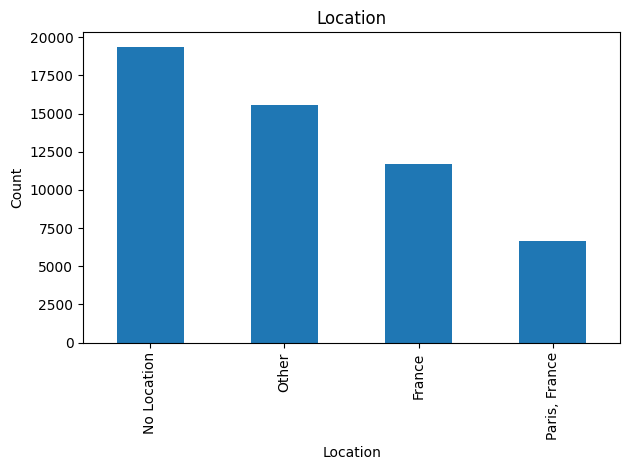

In [ ]:
#GRAPHIQUE DE LA DISTRIBUTION LOCATIONS

import matplotlib.pyplot as plt

# Obtenir les modalités de la variable 'Location' avec leurs fréquences
location_counts = df['Location'].value_counts()

# Créer le graphique à barres
location_counts.plot.bar()

# Ajouter des labels aux axes
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Ajouter un titre au graphique
plt.title('Location')

# Ajuster la disposition des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()








Désormais, la colonne "Location" ne contient que 4 modalités.

Un filtre a été indiqué lors de l'extraction pour obtenir uniquement les tweets en langue française. Néanmoins, nous allons verifié si c'est bien le cas.

In [ ]:
#Vérification du nombre de modalité dans la variable "Language"
df.Language.value_counts()

fr    53201
Name: Language, dtype: int64

In [ ]:
#Suppression des variables non utiles :  "Source", "TweetURL", "Language"
df = df.drop(["Source","TweetURL", "Language"], axis = 1)

Nous ne savons pas à quoi correspond la variable "verified". Après une brève recherche internet, je ne comprend pas l'interet de cette variable. Vérifions tout de même de quoi elle est composée



In [ ]:
#Nombre de modalité de la variable
df.Verified.value_counts()

False    53201
0            3
Name: Verified, dtype: int64

La variable est composée de valeurs "false" et "0". Ces valeurs n'apporteront rien à notre analyse. La variable sera supprimée

In [ ]:
#Suppression de la variable 'Verified'
df = df.drop(["Verified"], axis = 1)

In [ ]:
#Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53205 entries, 0 to 53204
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           53205 non-null  object 
 1   User           53204 non-null  object 
 2   Location       53205 non-null  object 
 3   Tweet          53201 non-null  object 
 4   Likes_Count    53198 non-null  float64
 5   Retweet_Count  53198 non-null  float64
 6   Quote_Count    53198 non-null  float64
 7   Reply_Count    53198 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.2+ MB


In [ ]:
#Observation des valeurs manquantes restantes
df.isna().sum()



Date             0
User             1
Location         0
Tweet            4
Likes_Count      7
Retweet_Count    7
Quote_Count      7
Reply_Count      7
dtype: int64

In [ ]:
#Suppression des entrées avec des valeurs manquantes
df = df.dropna()

In [ ]:
#Df sans valeurs manquantes
print(df.isna().sum())



Date             0
User             0
Location         0
Tweet            0
Likes_Count      0
Retweet_Count    0
Quote_Count      0
Reply_Count      0
dtype: int64


In [ ]:
#Observation des types des variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53198 entries, 0 to 53204
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           53198 non-null  object 
 1   User           53198 non-null  object 
 2   Location       53198 non-null  object 
 3   Tweet          53198 non-null  object 
 4   Likes_Count    53198 non-null  float64
 5   Retweet_Count  53198 non-null  float64
 6   Quote_Count    53198 non-null  float64
 7   Reply_Count    53198 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.7+ MB
None


In [ ]:
#Convertir la variable date
df['Date'] = pd.to_datetime(df['Date'])

#Verification 
display(df.info())

#to find the maximum date of the tweet
print(df["Date"].max())
#to find the minimum date of the tweet
print(df["Date"].min())
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53198 entries, 0 to 53204
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           53198 non-null  datetime64[ns, UTC]
 1   User           53198 non-null  object             
 2   Location       53198 non-null  object             
 3   Tweet          53198 non-null  object             
 4   Likes_Count    53198 non-null  float64            
 5   Retweet_Count  53198 non-null  float64            
 6   Quote_Count    53198 non-null  float64            
 7   Reply_Count    53198 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(3)
memory usage: 3.7+ MB


None

2023-06-04 22:13:53+00:00
2022-04-13 20:31:31+00:00


Il semblerait que l'extraction n'ai pas pu se faire avant le 13 avril 2022

Nous allons préparer la variable "tweets" pour y faire l'analyse de sentiment. Seulement, celle-ci requierant la suppression des caractères speciaux tels que les "#', nous allons d'abord analyser les hashtags les plus fréquement utiliser dans les tweets.

In [ ]:
#FONCTION POUR OBTENIR LES VALEURS SUIVIES DES # DE LA VARIABLE TWEET

#Création de la fonction
def getHashtags(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

# Créer la variable Hashtags = Variable Tweet où est appliquée la fonction
df['Hashtags'] = df['Tweet'].apply(getHashtags)
df.head(50)

,Date,User,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,Hashtags
0,2023-06-04 22:13:53+00:00,manuela_baya,Other,"King of fighters, Mario et Sony au Jeux olympi...",2.0,0.0,0.0,1.0,
1,2023-06-04 21:37:20+00:00,SEOforSme,No Location,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0.0,0.0,0.0,0.0,
2,2023-06-04 20:52:39+00:00,JolleGauthier1,No Location,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0.0,0.0,0.0,0.0,
3,2023-06-04 20:33:21+00:00,CKerdreux,No Location,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1.0,0.0,0.0,0.0,
4,2023-06-04 20:28:58+00:00,CKerdreux,No Location,@maksymeristavi Donc ils ont pas besoin de ven...,0.0,0.0,0.0,0.0,
5,2023-06-04 20:23:51+00:00,CKerdreux,No Location,@maksymeristavi Pas de russes aux jeux olympiq...,0.0,0.0,0.0,0.0,
6,2023-06-04 19:56:19+00:00,mynameiskb24,No Location,Espérons pour l'équipe de France et surtout Ma...,3.0,0.0,0.0,1.0,#paris2024 #edfbasket #bleues
7,2023-06-04 19:46:02+00:00,huguesneghnagh,No Location,Si les athlètes russes refusent de serrer la m...,0.0,0.0,0.0,0.0,
8,2023-06-04 19:25:36+00:00,ingrideuuh,Other,Toutes mes copines… pendant que moi je jouait ...,0.0,0.0,0.0,2.0,
9,2023-06-04 19:04:15+00:00,03PaulC,France,#JO2024 « De fortes incertitudes ». La Cour de...,1.0,0.0,1.0,0.0,#jo2024


In [ ]:
#DETERMINER LE COMPTE DE CHAQUE HASHTAGS

# Créee une liste
hashtags_list = df['Hashtags'].tolist()

# Créer une nouvelle liste pour stocker les hashtags divisés
hashtags = []

# Créer une boucle qui itère tous les hashtags, et les divise là ou se trouve plus d'un hashtag , puis la stock dans la liste hashtags
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

In [ ]:
#COMPTER LE NOMBRE DE HASHTAGS DIFFERENTS

# Importer le module "counter" 
from collections import Counter

# Determiner les valeurs unique de chaque hashtags
counts = Counter(hashtags)

#Création d'un df où se trouve les hashtags et leurs nombres
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)


print("Le nombre total de Hashtags différents est: ", hashtags_df.shape[0])

Le nombre total de Hashtags différents est:  6570


In [ ]:
#Verification
hashtags_df.head(10)

,Hashtags,count
0,#paris2024,2811
3,#jo2024,1136
87,#paris,653
205,#sport,485
33,#jeuxolympiques,404
120,#jo,339
428,#rugby2023,332
102,#jeux,318
17,#france,233
121,#jop2024,201


In [ ]:
#REMPLACER LES VALEURS VIDES PAR "No Hashtag used"

import numpy as np
# Remplacer les entrées vides par "No Hashtag used"
df['Hashtags'] = df['Hashtags'].replace('', np.nan).fillna('No Hashtag used')

#Observation des modalités de la variable Hashtags
df['Hashtags'].value_counts()

No Hashtag used                                                             41100
#paris2024                                                                   1000
#jo2024                                                                       338
#onmyoji                                                                      189
#paris                                                                        152
                                                                            ...  
#apsv #çamatchauzenith #sport #zenith #villette #culture #danse #hiphop         1
#france #jeuxolympiques #paris2024 #vélo #paris #seinesaintdenis #jo2024        1
#cholet #jeux #maine                                                            1
#boycottrussiansport #paris2024 #cio                                            1
#allyson #felix                                                                 1
Name: Hashtags, Length: 6650, dtype: int64

In [ ]:
hashtags_df.head(10)

#Sauvegarder en fichier csv
hashtags_df.to_csv('JO_Hashtags.csv')

In [ ]:
df.head()

,Date,User,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,Hashtags
0,2023-06-04 22:13:53+00:00,manuela_baya,Other,"King of fighters, Mario et Sony au Jeux olympi...",2.0,0.0,0.0,1.0,No Hashtag used
1,2023-06-04 21:37:20+00:00,SEOforSme,No Location,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0.0,0.0,0.0,0.0,No Hashtag used
2,2023-06-04 20:52:39+00:00,JolleGauthier1,No Location,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0.0,0.0,0.0,0.0,No Hashtag used
3,2023-06-04 20:33:21+00:00,CKerdreux,No Location,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1.0,0.0,0.0,0.0,No Hashtag used
4,2023-06-04 20:28:58+00:00,CKerdreux,No Location,@maksymeristavi Donc ils ont pas besoin de ven...,0.0,0.0,0.0,0.0,No Hashtag used


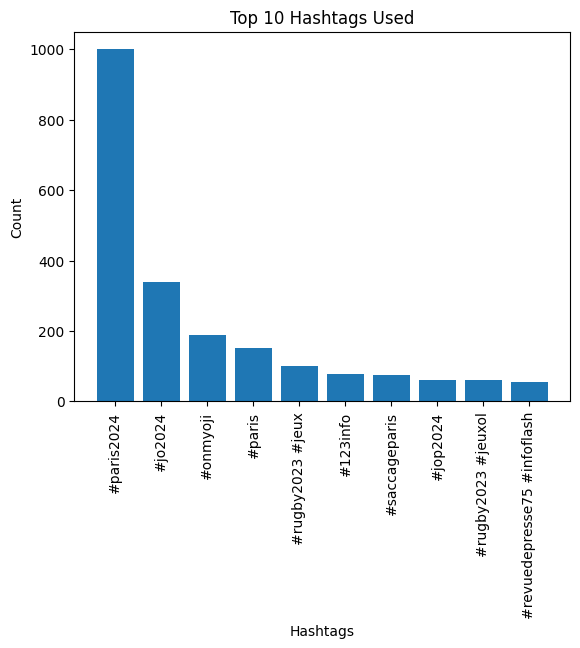

In [ ]:
#VISUALISATION DE LA VARIABLE HASHTAGS


import matplotlib.pyplot as plt

# Exclure la catégorie "No Hashtag Used"
hashtags_counts = df['Hashtags'].value_counts().drop('No Hashtag used')

# Sélectionner les 10 hashtags les plus utilisés
top_10_hashtags = hashtags_counts.head(10)

# Créer le graphique à barres
plt.bar(top_10_hashtags.index, top_10_hashtags.values)

# Ajouter des labels aux axes
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Ajouter un titre au graphique
plt.title('Top 10 Hashtags Used')

# Afficher le graphique
plt.show()

In [ ]:
df.to_csv('Tweets_df_clean.csv')

## B.Nettoyage du contenu des tweets

Afin de pouvoir analyser le contenu des tweets, plusieurs étapes sont à prévoir 🇰
- Supprimer les caractères spéciaux et la ponctuation 
- Supprimer les URLs 
- Supprimer les mentions d'utilisateurs 
- Supprimer les hashtags (#)
- Convertir en minuscules pour normaliser les données
- Supprimer les stops words 
- Lemmatisation 
- Supprimer les tweets vides .

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df = pd.read_csv('Tweets_df_clean.csv')

In [ ]:
#DEFINIR LES STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Importer les stopwords français
stop_words = set(stopwords.words('french'))

# Ajouter des stopwords supplémentaires
additional_stop_words = {'ai', 'aie', 'aient', 'aies', 'ait', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais',
                         'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aux', 'avaient',
                         'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant', 'ayante', 'ayantes',
                         'ayants', 'ayez', 'ayons', 'c', 'ce', 'ces', 'd', 'dans', 'de', 'des', 'du', 'elle', 'en',
                         'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses',
                         'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'furent', 'fus', 'fusse',
                         'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'il', 'ils',
                         'j', 'je', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi',
                         'mon', 'même', 'n', 'ne', 'nos', 'notre', 'nous', 'on', 'ont', 'ou', 'par', 'pas', 'pour',
                         'qu', 'que', 'qui', 's', 'sa', 'se', 'sera', 'serai', 'seraient', 'serais', 'serait',
                         'seras', 'serez', 'seriez', 'serions', 'serons', 'seront', 'ses', 'soient', 'sois', 'soit',
                         'sommes', 'son', 'sont', 'soyez', 'soyons', 'suis', 'sur', 't', 'ta', 'te', 'tes', 'toi',
                         'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'y', 'à', 'étaient', 'étais', 'était',
                         'étant', 'étante', 'étantes', 'étants', 'étiez', 'étions', 'été', 'étée', 'étées', 'étés',
                         'êtes', 'donc'}
stop_words.update(additional_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Définir une fonction pour le PREPROCESSING

#PREPROCESSING
import re

def processing_pipeline(text):
    # Convertir le texte en minuscules
    text = text.lower()
    # Remplacer les sauts de ligne par un espace
    text = text.replace('\n', ' ').replace('\r', '')
    # Supprimer les espaces supplémentaires
    text = ' '.join(text.split())
    # Supprimer les mots contenant des chiffres
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    # Supprimer les tirets en fin de mot ou entourés d'espaces
    text = re.sub(r"(\s\-\s|-$)", "", text)
    # Supprimer les signes de ponctuation spécifiques
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    # Supprimer les mots commençant par "&" suivis de caractères non-espace
    text = re.sub(r"\&\S*\s", "", text)
    # Supprimer les "&" restants
    text = re.sub(r"\&", "", text)
    # Supprimer les caractères spécifiques
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    # Supprimer les URLs commençant par "http://" ou "https://"
    text = re.sub(r"http\S+|https\S+", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Supprimer les stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Rejoindre les tokens pour reformer le texte
    text = ' '.join(tokens)

    return text

  
     

In [ ]:
#Appliquer la fonction à la variable Tweet
data = df['Tweet']
data_clean = data.apply(processing_pipeline)


0    king of fighters mario sony jeux olympiques av...
1    newstadiumsdz magnifique pu organiser jeux oly...
2    petit bonhomme oublie vite bêtes méchants a pl...
3    maksymeristavi raison rien voleurs assassins r...
4    maksymeristavi besoin venir parader paris jeux...
Name: Tweet, dtype: object

#**3.Analyse de sentiment avec textblob**

Le but de cette analyse est de pouvoir classifier les tweets 
selon les sentiments qui semblent en ressortir

In [ ]:
#Import des modules 
!pip install textblob
!pip install textblob-fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.2/561.2 kB 9.3 MB/s eta 0:00:00


In [ ]:
#Importer les librairies nécessaire
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
# Initialisation des listes de polarité et de sentiment
polarity = []
sentiment = []

# Boucle sur les tweets prétraités dans data_clean
for tweet in data_clean:
    # Créer un objet TextBlob à partir du tweet avec le pos_tagger PatternTagger et l'analyzer PatternAnalyzer
    blob = TextBlob(tweet, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

    # Extraire la polarité du sentiment du tweet et l'ajouter à la liste polarity
    polarity.append(blob.sentiment[0])
    
    # Établir le sentiment en fonction de la polarité
    if blob.sentiment[0] > 0:
        sentiment.append("Positif")
    elif blob.sentiment[0] < 0:
        sentiment.append("Négatif")
    else:
        sentiment.append("Neutre")

# Ajout des colonnes de polarité et de sentiment au DataFrame existant df
df = df.assign(Polarity=polarity, Sentiment=sentiment)


In [ ]:
#Verification
df.head()

,Unnamed: 0,Date,User,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,Hashtags,Polarity,Sentiment
0,0,2023-06-04 22:13:53+00:00,manuela_baya,Other,"King of fighters, Mario et Sony au Jeux olympi...",2.0,0.0,0.0,1.0,No Hashtag used,0.000,Neutre
1,1,2023-06-04 21:37:20+00:00,SEOforSme,No Location,"@NewStadiumsDZ Magnifique, on aurait pu organi...",0.0,0.0,0.0,0.0,No Hashtag used,1.000,Positif
2,2,2023-06-04 20:52:39+00:00,JolleGauthier1,No Location,"Petit bonhomme, oublie vite ces bêtes &amp; mé...",0.0,0.0,0.0,0.0,No Hashtag used,0.165,Positif
3,3,2023-06-04 20:33:21+00:00,CKerdreux,No Location,@DouglasCCampbe2 @maksymeristavi Vous avez rai...,1.0,0.0,0.0,0.0,No Hashtag used,0.000,Neutre
4,4,2023-06-04 20:28:58+00:00,CKerdreux,No Location,@maksymeristavi Donc ils ont pas besoin de ven...,0.0,0.0,0.0,0.0,No Hashtag used,0.000,Neutre


In [ ]:
#Observer les modalité de la variable "sentiment"
df.Sentiment.value_counts()

Positif    26176
Neutre     17435
Négatif     9587
Name: Sentiment, dtype: int64

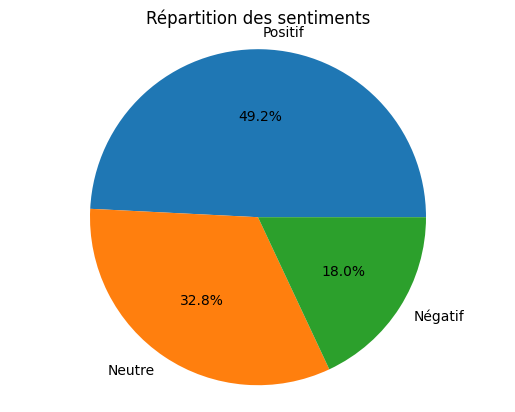

In [ ]:
#Visualisation de la distrib de la variable

import matplotlib.pyplot as plt

# Compter le nombre de tweets par sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Créer le diagramme circulaire
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Répartition des sentiments')

# Afficher le diagramme circulaire
plt.axis('equal')
plt.show()

D'autres librairie telles que NLTK et Vader ont été testé. Elles n'ont pas réussi à polariser correctement les tweets et ont fourni des résultats de sentiment erronés ( même résultats pour les deux modèles). Les bibliothèques peuvent avoir du mal à interpréter les expressions informelles et les éléments spécifiques aux tweets, ce qui entraîne des résultats incorrects. De plus, les modèles utilisés par ces bibliothèques peuvent ne pas être adaptés à la diversité des sentiments exprimés dans les tweets réels. Il est donc important d'interpréter les résultats avec prudence et de considérer d'autres approches, ainsi que de réaliser une analyse manuelle pour obtenir une meilleure compréhension des sentiments réels exprimés dans les tweets. 





In [ ]:
df = df.drop('Unnamed: 0', axis = 1	)

In [ ]:
#Enregistrement du df
df.to_csv('Tweets_df_analyse_sentiment.csv')

#**4. WordCloud**

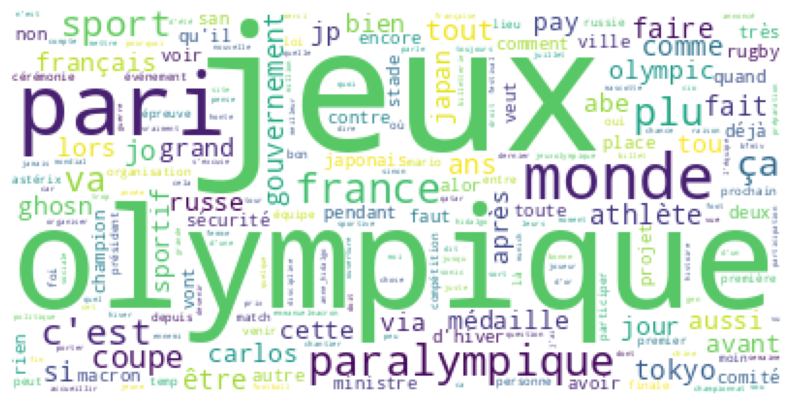

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data_clean)


wc = WordCloud(background_color="white", max_words=800,
               max_font_size=90, random_state=42, collocations=False)

wc.generate(text)

plt.figure(figsize= (10,10)) 
plt.imshow(wc) 
plt.axis('off')
plt.show()